# DS processing with CLI

In this tutorial, we demostrate how to do standard DS processing with the decorrelation CLI interface.

## Load GAMMA result

The data from gamma software needed for this tutorial:

In [ ]:
!ls -R ../../data/gamma/

../../data/gamma/:
DEM  geocoding	rslc

../../data/gamma/DEM:
dem_seg  dem_seg_par

../../data/gamma/geocoding:
20210802.diff_par  20210802.lt_fine  20210802.lv_theta
20210802.hgt	   20210802.lv_phi

../../data/gamma/rslc:
20210802.rslc	   20211011.rslc.par  20220718.rslc	 20220912.rslc.par
20210802.rslc.par  20211025.rslc      20220718.rslc.par  20220926.rslc
20210816.rslc	   20211025.rslc.par  20220801.rslc	 20220926.rslc.par
20210816.rslc.par  20220606.rslc      20220801.rslc.par  20221010.rslc
20210830.rslc	   20220606.rslc.par  20220815.rslc	 20221010.rslc.par
20210830.rslc.par  20220620.rslc      20220815.rslc.par  20221024.rslc
20210913.rslc	   20220620.rslc.par  20220829.rslc	 20221024.rslc.par
20210913.rslc.par  20220704.rslc      20220829.rslc.par
20211011.rslc	   20220704.rslc.par  20220912.rslc


And we load them with functions in the `load` module:

In [ ]:
from decorrelation.cli.load import (de_load_gamma_flatten_rslc,
                                    de_load_gamma_lat_lon_hgt,
                                    de_load_gamma_look_vector,
                                    de_load_gamma_range,
                                    de_load_gamma_metadata)

The detailed usage of these functions is explained [here](../CLI/load.ipynb)

In [ ]:
rslc_dir = '../../data/gamma/rslc'
reference = '20220620'
rslc_par = '../../data/gamma/rslc/20220620.rslc.par'
hgt = '../../data/gamma/geocoding/20210802.hgt'
lt = '../../data/gamma/geocoding/20210802.lt_fine'
diff_par = '../../data/gamma/geocoding/20210802.diff_par'
dem_par = '../../data/gamma/DEM/dem_seg_par'
theta = '../../data/gamma/geocoding/20210802.lv_theta'
phi = '../../data/gamma/geocoding/20210802.lv_phi'
az_chunk_size = 1000

rslc_zarr = './DS_Processing_with_CLI/rslc.zarr'
lat_zarr = './DS_Processing_with_CLI/lat.zarr'
lon_zarr = './DS_Processing_with_CLI/lon.zarr'
theta_zarr = './DS_Processing_with_CLI/theta.zarr'
phi_zarr = './DS_Processing_with_CLI/phi.zarr'
hgt_zarr = './DS_Processing_with_CLI/hgt.zarr'
range_zarr = './DS_Processing_with_CLI/range.zarr'
meta_file = './DS_Processing_with_CLI/meta.toml'

In [ ]:
de_load_gamma_flatten_rslc(rslc_dir,reference,hgt,rslc_zarr,az_chunk_size)
de_load_gamma_lat_lon_hgt(diff_par,rslc_par,dem_par,hgt,lat_zarr,lon_zarr,hgt_zarr,az_chunk_size)
de_load_gamma_look_vector(theta,phi,lt,rslc_par,dem_par,theta_zarr,phi_zarr,az_chunk_size)
de_load_gamma_range(rslc_par,range_zarr,az_chunk_size)
de_load_gamma_metadata(rslc_dir,reference,meta_file)

2023-10-19 19:44:29 - de_load_gamma_flatten_rslc - INFO - fetching args:
2023-10-19 19:44:29 - de_load_gamma_flatten_rslc - INFO - rslc_dir = '../../data/gamma/rslc'
2023-10-19 19:44:29 - de_load_gamma_flatten_rslc - INFO - reference = '20220620'
2023-10-19 19:44:29 - de_load_gamma_flatten_rslc - INFO - hgt = '../../data/gamma/geocoding/20210802.hgt'
2023-10-19 19:44:29 - de_load_gamma_flatten_rslc - INFO - rslc_zarr = './DS_Processing_with_CLI/rslc.zarr'
2023-10-19 19:44:29 - de_load_gamma_flatten_rslc - INFO - az_chunk_size = 1000
2023-10-19 19:44:29 - de_load_gamma_flatten_rslc - INFO - log = None
2023-10-19 19:44:29 - de_load_gamma_flatten_rslc - INFO - fetching args done.
2023-10-19 19:44:29 - de_load_gamma_flatten_rslc - INFO - rslc found: 
        date                                 rslc  \
0   20210802  ../../data/gamma/rslc/20210802.rslc   
1   20210816  ../../data/gamma/rslc/20210816.rslc   
2   20210830  ../../data/gamma/rslc/20210830.rslc   
3   20210913  ../../data/gamma/

Then we get all needed data: look vector, latitude, lontitude, height, metadata, slant range distance, and flattened rslc stack.

## DS candidates selection

First, we select spatial homogenious pixels:

In [ ]:
from decorrelation.cli.shp import de_shp_test

In [ ]:
rslc = './DS_Processing_with_CLI/rslc.zarr'
pvalue = './DS_Processing_with_CLI/pvalue.zarr'
az_half_win = 5
r_half_win = 5
method = 'ks'
az_chunk_size = 1000

In [ ]:
de_shp_test(rslc,pvalue,
            az_half_win=az_half_win,r_half_win=r_half_win,
            method=method,az_chunk_size=az_chunk_size)

2023-10-19 19:45:31 - de_shp_test - INFO - fetching args:
2023-10-19 19:45:31 - de_shp_test - INFO - rslc = './DS_Processing_with_CLI/rslc.zarr'
2023-10-19 19:45:31 - de_shp_test - INFO - pvalue = './DS_Processing_with_CLI/pvalue.zarr'
2023-10-19 19:45:31 - de_shp_test - INFO - az_half_win = 5
2023-10-19 19:45:31 - de_shp_test - INFO - r_half_win = 5
2023-10-19 19:45:31 - de_shp_test - INFO - method = 'ks'
2023-10-19 19:45:31 - de_shp_test - INFO - n_az_chunk = None
2023-10-19 19:45:31 - de_shp_test - INFO - az_chunk_size = 1000
2023-10-19 19:45:31 - de_shp_test - INFO - log = None
2023-10-19 19:45:31 - de_shp_test - INFO - fetching args done.
2023-10-19 19:45:31 - de_shp_test - INFO - hypothetic test method: ks
2023-10-19 19:45:31 - de_shp_test - INFO - ./DS_Processing_with_CLI/rslc.zarr zarray shape: (2500, 1834, 17)
2023-10-19 19:45:31 - de_shp_test - INFO - ./DS_Processing_with_CLI/rslc.zarr zarray chunks: (1000, 1834, 1)
2023-10-19 19:45:31 - de_shp_test - INFO - ./DS_Processing_w

Here we use two sample Kolmogorov-Smirnov (KS) test for SHP identification.
The output `pvalue` is the P-value for this test.
The smaller the p-value, the more likely the two sample are from same distribution, i.e.,
the more likely the two pixels are SHP to each other.

Then we select SHP by setting a threshold on this Pvalue, and select DS by seeting a threshold on the number of SHP pixels have. They are done with one single function:

In [ ]:
from decorrelation.cli.shp import de_select_shp
import zarr
from matplotlib import pyplot as plt
import colorcet

In [ ]:
is_shp = './DS_Processing_with_CLI/is_shp.zarr'
shp_num = './DS_Processing_with_CLI/shp_num.zarr'
p_max = 0.05
az_chunk_size = 1000

In [ ]:
de_select_shp(pvalue,is_shp,shp_num,p_max=p_max,az_chunk_size=az_chunk_size)

2023-10-22 23:43:59 - de_select_shp - INFO - fetching args:
2023-10-22 23:43:59 - de_select_shp - INFO - pvalue = './DS_Processing_with_CLI/pvalue.zarr'
2023-10-22 23:43:59 - de_select_shp - INFO - is_shp = './DS_Processing_with_CLI/is_shp.zarr'
2023-10-22 23:43:59 - de_select_shp - INFO - shp_num = './DS_Processing_with_CLI/shp_num.zarr'
2023-10-22 23:43:59 - de_select_shp - INFO - p_max = 0.05
2023-10-22 23:43:59 - de_select_shp - INFO - n_az_chunk = None
2023-10-22 23:43:59 - de_select_shp - INFO - az_chunk_size = 1000
2023-10-22 23:43:59 - de_select_shp - INFO - log = None
2023-10-22 23:43:59 - de_select_shp - INFO - fetching args done.
2023-10-22 23:43:59 - de_select_shp - INFO - ./DS_Processing_with_CLI/pvalue.zarr zarray shape: (2500, 1834, 11, 11)
2023-10-22 23:43:59 - de_select_shp - INFO - ./DS_Processing_with_CLI/pvalue.zarr zarray chunks: (1000, 1834, 11, 11)
2023-10-22 23:43:59 - de_select_shp - INFO - ./DS_Processing_with_CLI/pvalue.zarr zarray dtype: float32
2023-10-22 2

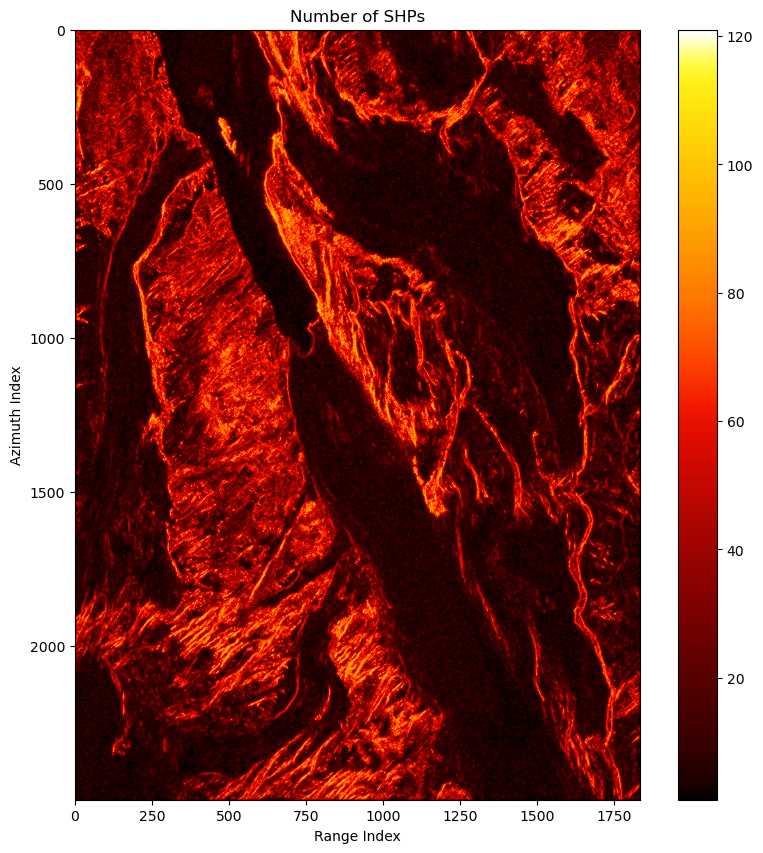

In [ ]:
shp_num_zarr = zarr.open(shp_num,'r')
fig, ax = plt.subplots(1,1,figsize=(10,10))
pcm = ax.imshow(shp_num_zarr[:],cmap=colorcet.cm.fire)
ax.set(title='Number of SHPs',xlabel='Range Index',ylabel='Azimuth Index')
fig.colorbar(pcm)
fig.show()

In [ ]:
from decorrelation.cli.pc import de_pc_thres_ras, de_ras2pc, de_idx2bool,de_pc2ras

In [ ]:
ds_can_idx = './DS_Processing_with_CLI/ds_can_idx.zarr'
is_ds_can= './DS_Processing_with_CLI/is_ds_can.zarr'
ds_can_is_shp = './DS_Processing_with_CLI/ds_can_is_shp.zarr'

In [ ]:
de_pc_thres_ras(shp_num,ds_can_idx,min_thres=50)
de_ras2pc(ds_can_idx, is_shp, ds_can_is_shp)
de_idx2bool(ds_can_idx, is_ds_can, shape= shp_num_zarr.shape)

2023-10-19 19:53:48 - de_pc_thres_ras - INFO - fetching args:
2023-10-19 19:53:48 - de_pc_thres_ras - INFO - ras = './DS_Processing_with_CLI/shp_num.zarr'
2023-10-19 19:53:48 - de_pc_thres_ras - INFO - idx = './DS_Processing_with_CLI/ds_can_idx.zarr'
2023-10-19 19:53:48 - de_pc_thres_ras - INFO - min_thres = 50
2023-10-19 19:53:48 - de_pc_thres_ras - INFO - max_thres = None
2023-10-19 19:53:48 - de_pc_thres_ras - INFO - pc_chunk_size = None
2023-10-19 19:53:48 - de_pc_thres_ras - INFO - n_pc_chunk = None
2023-10-19 19:53:48 - de_pc_thres_ras - INFO - log = None
2023-10-19 19:53:48 - de_pc_thres_ras - INFO - fetching args done.
2023-10-19 19:53:48 - de_pc_thres_ras - INFO - ./DS_Processing_with_CLI/shp_num.zarr zarray shape: (2500, 1834)
2023-10-19 19:53:48 - de_pc_thres_ras - INFO - ./DS_Processing_with_CLI/shp_num.zarr zarray chunks: (1000, 1834)
2023-10-19 19:53:48 - de_pc_thres_ras - INFO - ./DS_Processing_with_CLI/shp_num.zarr zarray dtype: int32
2023-10-19 19:53:48 - de_pc_thres_r

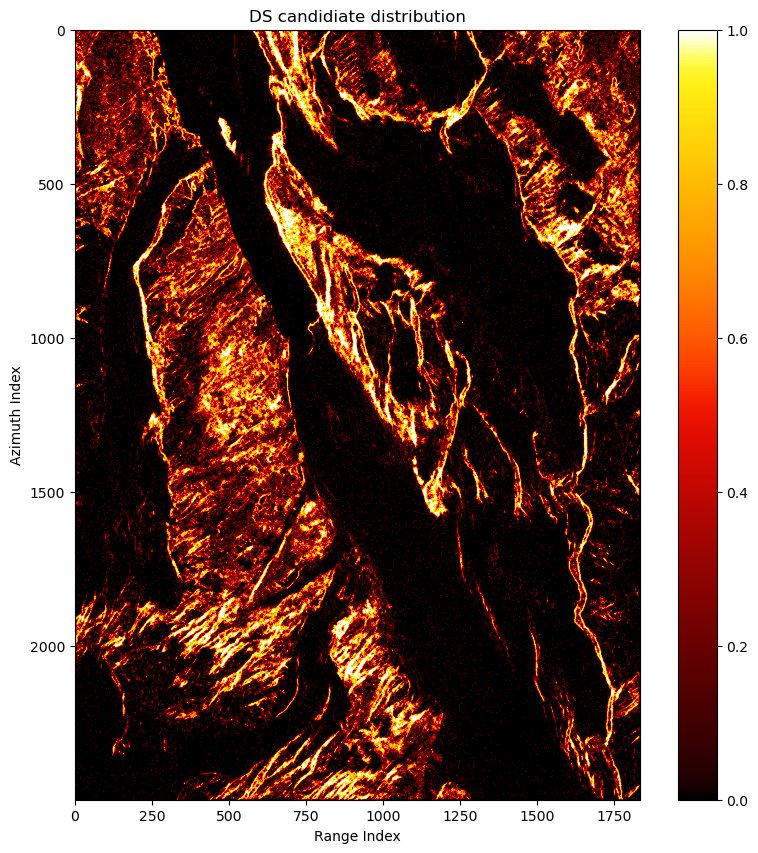

In [ ]:
is_ds_can_zarr = zarr.open(is_ds_can,'r')
fig, ax = plt.subplots(1,1,figsize=(10,10))
pcm = ax.imshow(is_ds_can_zarr[:],cmap=colorcet.cm.fire)
ax.set(title='DS candidiate distribution',xlabel='Range Index',ylabel='Azimuth Index')
fig.colorbar(pcm)
fig.show()

The output `ds_can_is_shp` indicate wheather a DS candidate in the window is a SHP to its center pixel.
`ds_can_idx` is a int array with shape of (2, num_of_DS_can). It indicate the position of DS candidate in radar coordinate.

## Coherence matrix estimation

Then we estimate the coherence matrix of ds candidate:

In [ ]:
from decorrelation.cli.co import de_emperical_co_pc

In [ ]:
ds_can_coh = './DS_Processing_with_CLI/ds_can_coh.zarr'
ds_can_coh_ave = './DS_Processing_with_CLI/ds_can_coh_ave.zarr'

In [ ]:
de_emperical_co_pc(rslc,ds_can_is_shp,ds_can_idx,ds_can_coh,ds_can_coh_ave)

2023-10-19 19:56:40 - de_emperical_co_pc - INFO - fetching args:
2023-10-19 19:56:40 - de_emperical_co_pc - INFO - rslc = './DS_Processing_with_CLI/rslc.zarr'
2023-10-19 19:56:40 - de_emperical_co_pc - INFO - is_shp = './DS_Processing_with_CLI/ds_can_is_shp.zarr'
2023-10-19 19:56:40 - de_emperical_co_pc - INFO - idx = './DS_Processing_with_CLI/ds_can_idx.zarr'
2023-10-19 19:56:40 - de_emperical_co_pc - INFO - coh = './DS_Processing_with_CLI/ds_can_coh.zarr'
2023-10-19 19:56:40 - de_emperical_co_pc - INFO - coh_ave = './DS_Processing_with_CLI/ds_can_coh_ave.zarr'
2023-10-19 19:56:40 - de_emperical_co_pc - INFO - az_chunk_size = None
2023-10-19 19:56:40 - de_emperical_co_pc - INFO - n_pc_chunk = None
2023-10-19 19:56:40 - de_emperical_co_pc - INFO - pc_chunk_size = None
2023-10-19 19:56:40 - de_emperical_co_pc - INFO - log = None
2023-10-19 19:56:40 - de_emperical_co_pc - INFO - fetching args done.
2023-10-19 19:56:40 - de_emperical_co_pc - INFO - ./DS_Processing_with_CLI/rslc.zarr zarra

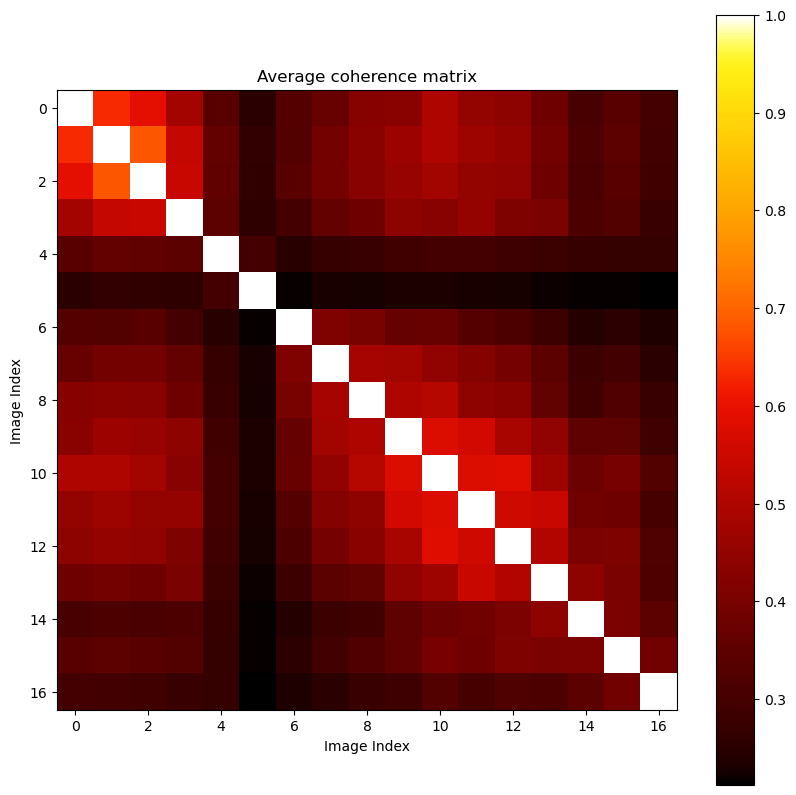

In [ ]:
ds_can_coh_ave_zarr = zarr.open(ds_can_coh_ave,'r')
fig, ax = plt.subplots(1,1,figsize=(10,10))
pcm = ax.imshow(ds_can_coh_ave_zarr[:],cmap=colorcet.cm.fire)
ax.set(title='Average coherence matrix',xlabel='Image Index',ylabel='Image Index')
fig.colorbar(pcm)
fig.show()

## Phase linking

To get rid of the closure phase, phase linking is applied here:

In [ ]:
from decorrelation.cli.pl import de_emi

In [ ]:
ds_can_ph = './DS_Processing_with_CLI/ds_can_ph.zarr'
ds_can_emi_quality = './DS_Processing_with_CLI/ds_can_emi_quality.zarr'
emi_quality = './DS_Processing_with_CLI/emi_quality.zarr'

In [ ]:
de_emi(ds_can_coh,ds_can_ph,ds_can_emi_quality)

2023-10-19 19:58:25 - de_emi - INFO - fetching args:
2023-10-19 19:58:25 - de_emi - INFO - coh = './DS_Processing_with_CLI/ds_can_coh.zarr'
2023-10-19 19:58:25 - de_emi - INFO - ph = './DS_Processing_with_CLI/ds_can_ph.zarr'
2023-10-19 19:58:25 - de_emi - INFO - emi_quality = './DS_Processing_with_CLI/ds_can_emi_quality.zarr'
2023-10-19 19:58:25 - de_emi - INFO - ref = 0
2023-10-19 19:58:25 - de_emi - INFO - n_pc_chunk = None
2023-10-19 19:58:25 - de_emi - INFO - pc_chunk_size = None
2023-10-19 19:58:25 - de_emi - INFO - log = None
2023-10-19 19:58:25 - de_emi - INFO - fetching args done.
2023-10-19 19:58:25 - de_emi - INFO - ./DS_Processing_with_CLI/ds_can_coh.zarr zarray shape: (740397, 17, 17)
2023-10-19 19:58:25 - de_emi - INFO - ./DS_Processing_with_CLI/ds_can_coh.zarr zarray chunks: (246799, 17, 17)
2023-10-19 19:58:25 - de_emi - INFO - ./DS_Processing_with_CLI/ds_can_coh.zarr zarray dtype: complex64
2023-10-19 19:58:25 - de_emi - INFO - automatically determine pc_chunk_size from

In [ ]:
rslc_zarr = zarr.open(rslc,'r')
de_pc2ras(ds_can_idx, ds_can_emi_quality,emi_quality,rslc_zarr.shape[:2],az_chunk_size=rslc_zarr.chunks[0])

2023-10-19 20:00:50 - de_pc2ras - INFO - fetching args:
2023-10-19 20:00:50 - de_pc2ras - INFO - idx = './DS_Processing_with_CLI/ds_can_idx.zarr'
2023-10-19 20:00:50 - de_pc2ras - INFO - pc = './DS_Processing_with_CLI/ds_can_emi_quality.zarr'
2023-10-19 20:00:50 - de_pc2ras - INFO - ras = './DS_Processing_with_CLI/emi_quality.zarr'
2023-10-19 20:00:50 - de_pc2ras - INFO - shape = (2500, 1834)
2023-10-19 20:00:50 - de_pc2ras - INFO - az_chunk_size = 1000
2023-10-19 20:00:50 - de_pc2ras - INFO - n_az_chunk = None
2023-10-19 20:00:50 - de_pc2ras - INFO - log = None
2023-10-19 20:00:50 - de_pc2ras - INFO - fetching args done.
2023-10-19 20:00:50 - de_pc2ras - INFO - idx zarray shape: (2, 740397)
2023-10-19 20:00:50 - de_pc2ras - INFO - idx zarray chunks: (2, 246799)
2023-10-19 20:00:50 - de_pc2ras - INFO - idx zarray dtype: int32
2023-10-19 20:00:50 - de_pc2ras - INFO - got az_chunk_size for ras: 1000
2023-10-19 20:00:50 - de_pc2ras - INFO - loading idx into memory.
2023-10-19 20:00:50 - d

<matplotlib.colorbar.Colorbar>

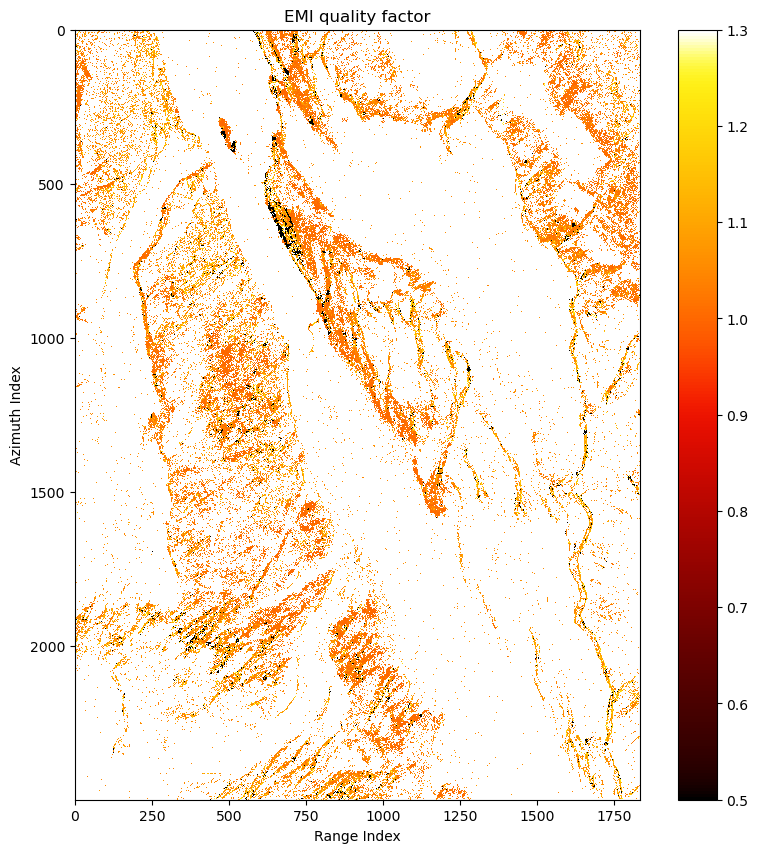

In [ ]:
emi_zarr = zarr.open(emi_quality,'r')
fig, ax = plt.subplots(1,1,figsize=(10,10))
pcm = ax.imshow(emi_zarr[:],interpolation='nearest',vmin=0.5,vmax=1.3,cmap=colorcet.cm.fire)
ax.set(title='EMI quality factor',xlabel='Range Index',ylabel='Azimuth Index')
fig.colorbar(pcm)

We can also estimate a temporal coherence for DS:

In [ ]:
from decorrelation.cli.pl import de_ds_temp_coh

In [ ]:
ds_can_t_coh = './DS_Processing_with_CLI/ds_can_t_coh.zarr'

In [ ]:
de_ds_temp_coh(ds_can_coh,ds_can_ph, ds_can_t_coh)

2023-10-22 23:47:32 - de_ds_temp_coh - INFO - fetching args:
2023-10-22 23:47:32 - de_ds_temp_coh - INFO - coh = './DS_Processing_with_CLI/ds_can_coh.zarr'
2023-10-22 23:47:32 - de_ds_temp_coh - INFO - ph = './DS_Processing_with_CLI/ds_can_ph.zarr'
2023-10-22 23:47:32 - de_ds_temp_coh - INFO - t_coh = './DS_Processing_with_CLI/ds_can_t_coh.zarr'
2023-10-22 23:47:32 - de_ds_temp_coh - INFO - n_pc_chunk = None
2023-10-22 23:47:32 - de_ds_temp_coh - INFO - pc_chunk_size = None
2023-10-22 23:47:32 - de_ds_temp_coh - INFO - log = None
2023-10-22 23:47:32 - de_ds_temp_coh - INFO - fetching args done.
2023-10-22 23:47:32 - de_ds_temp_coh - INFO - ./DS_Processing_with_CLI/ds_can_coh.zarr zarray shape: (740397, 17, 17)
2023-10-22 23:47:32 - de_ds_temp_coh - INFO - ./DS_Processing_with_CLI/ds_can_coh.zarr zarray chunks: (246799, 17, 17)
2023-10-22 23:47:32 - de_ds_temp_coh - INFO - ./DS_Processing_with_CLI/ds_can_coh.zarr zarray dtype: complex64
2023-10-22 23:47:32 - de_ds_temp_coh - INFO - ./DS

Plot it:

In [ ]:
t_coh = './DS_Processing_with_CLI/t_coh.zarr'
rslc_zarr = zarr.open(rslc,'r')
de_pc2ras(ds_can_idx, ds_can_t_coh,t_coh,rslc_zarr.shape[:2],az_chunk_size=rslc_zarr.chunks[0])

2023-10-22 23:49:21 - de_pc2ras - INFO - fetching args:
2023-10-22 23:49:21 - de_pc2ras - INFO - idx = './DS_Processing_with_CLI/ds_can_idx.zarr'
2023-10-22 23:49:21 - de_pc2ras - INFO - pc = './DS_Processing_with_CLI/ds_can_t_coh.zarr'
2023-10-22 23:49:21 - de_pc2ras - INFO - ras = './DS_Processing_with_CLI/t_coh.zarr'
2023-10-22 23:49:21 - de_pc2ras - INFO - shape = (2500, 1834)
2023-10-22 23:49:21 - de_pc2ras - INFO - az_chunk_size = 1000
2023-10-22 23:49:21 - de_pc2ras - INFO - n_az_chunk = None
2023-10-22 23:49:21 - de_pc2ras - INFO - log = None
2023-10-22 23:49:21 - de_pc2ras - INFO - fetching args done.
2023-10-22 23:49:21 - de_pc2ras - INFO - idx zarray shape: (2, 740397)
2023-10-22 23:49:21 - de_pc2ras - INFO - idx zarray chunks: (2, 246799)
2023-10-22 23:49:21 - de_pc2ras - INFO - idx zarray dtype: int32
2023-10-22 23:49:21 - de_pc2ras - INFO - got az_chunk_size for ras: 1000
2023-10-22 23:49:21 - de_pc2ras - INFO - loading idx into memory.
2023-10-22 23:49:21 - de_pc2ras - I

<matplotlib.colorbar.Colorbar>

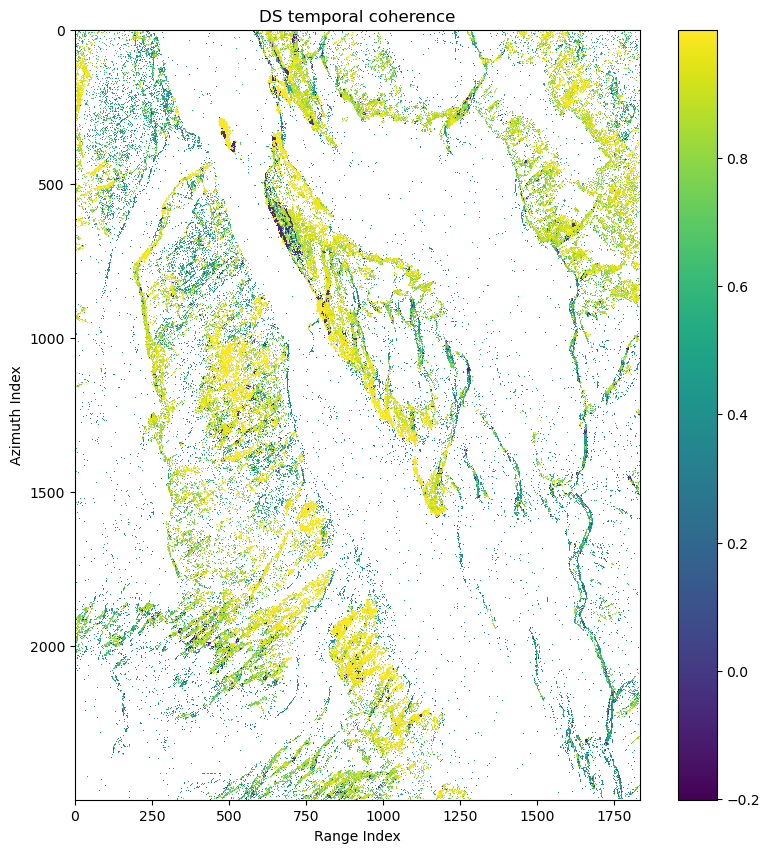

In [ ]:
t_coh_zarr = zarr.open(t_coh,'r')
fig, ax = plt.subplots(1,1,figsize=(10,10))
pcm = ax.imshow(t_coh_zarr[:],interpolation='nearest')
ax.set(title='DS temporal coherence',xlabel='Range Index',ylabel='Azimuth Index')
fig.colorbar(pcm)

## DS candidiates refinement

Then, we refine the ds candidate using EMI quality factor and the temporal coherence:

In [ ]:
from decorrelation.cli.pc import de_pc_thres_pc,de_pc_union,de_pc_select_data

In [ ]:
ds_can_r1_idx = './DS_Processing_with_CLI/ds_can_r1_idx.zarr'
de_pc_thres_pc(ds_can_idx, ds_can_emi_quality,ds_can_r1_idx,min_thres=1.0,max_thres=1.1)

2023-10-23 00:17:21 - de_pc_thres_pc - INFO - fetching args:
2023-10-23 00:17:21 - de_pc_thres_pc - INFO - idx_in = './DS_Processing_with_CLI/ds_can_idx.zarr'
2023-10-23 00:17:21 - de_pc_thres_pc - INFO - pc_in = './DS_Processing_with_CLI/ds_can_emi_quality.zarr'
2023-10-23 00:17:21 - de_pc_thres_pc - INFO - idx = './DS_Processing_with_CLI/ds_can_r1_idx.zarr'
2023-10-23 00:17:21 - de_pc_thres_pc - INFO - min_thres = 1.0
2023-10-23 00:17:21 - de_pc_thres_pc - INFO - max_thres = 1.1
2023-10-23 00:17:21 - de_pc_thres_pc - INFO - pc_chunk_size = None
2023-10-23 00:17:21 - de_pc_thres_pc - INFO - n_pc_chunk = None
2023-10-23 00:17:21 - de_pc_thres_pc - INFO - log = None
2023-10-23 00:17:21 - de_pc_thres_pc - INFO - fetching args done.
2023-10-23 00:17:21 - de_pc_thres_pc - INFO - ./DS_Processing_with_CLI/ds_can_idx.zarr zarray shape: (2, 740397)
2023-10-23 00:17:21 - de_pc_thres_pc - INFO - ./DS_Processing_with_CLI/ds_can_idx.zarr zarray chunks: (2, 246799)
2023-10-23 00:17:21 - de_pc_thres

In [ ]:
ds_can_r2_idx = './DS_Processing_with_CLI/ds_can_r2_idx.zarr'
de_pc_thres_pc(ds_can_idx, ds_can_t_coh,ds_can_r2_idx,min_thres=0.7,max_thres=1.0)

2023-10-23 00:17:24 - de_pc_thres_pc - INFO - fetching args:
2023-10-23 00:17:24 - de_pc_thres_pc - INFO - idx_in = './DS_Processing_with_CLI/ds_can_idx.zarr'
2023-10-23 00:17:24 - de_pc_thres_pc - INFO - pc_in = './DS_Processing_with_CLI/ds_can_t_coh.zarr'
2023-10-23 00:17:24 - de_pc_thres_pc - INFO - idx = './DS_Processing_with_CLI/ds_can_r2_idx.zarr'
2023-10-23 00:17:24 - de_pc_thres_pc - INFO - min_thres = 0.7
2023-10-23 00:17:24 - de_pc_thres_pc - INFO - max_thres = 1.0
2023-10-23 00:17:24 - de_pc_thres_pc - INFO - pc_chunk_size = None
2023-10-23 00:17:24 - de_pc_thres_pc - INFO - n_pc_chunk = None
2023-10-23 00:17:24 - de_pc_thres_pc - INFO - log = None
2023-10-23 00:17:24 - de_pc_thres_pc - INFO - fetching args done.
2023-10-23 00:17:24 - de_pc_thres_pc - INFO - ./DS_Processing_with_CLI/ds_can_idx.zarr zarray shape: (2, 740397)
2023-10-23 00:17:24 - de_pc_thres_pc - INFO - ./DS_Processing_with_CLI/ds_can_idx.zarr zarray chunks: (2, 246799)
2023-10-23 00:17:24 - de_pc_thres_pc - 

Merge them together:

In [ ]:
ds_idx = './DS_Processing_with_CLI/ds_idx.zarr'
de_pc_union(ds_can_r1_idx,ds_can_r2_idx,ds_idx)

2023-10-23 00:17:25 - de_pc_union - INFO - fetching args:
2023-10-23 00:17:25 - de_pc_union - INFO - idx1 = './DS_Processing_with_CLI/ds_can_r1_idx.zarr'
2023-10-23 00:17:25 - de_pc_union - INFO - idx2 = './DS_Processing_with_CLI/ds_can_r2_idx.zarr'
2023-10-23 00:17:25 - de_pc_union - INFO - idx = './DS_Processing_with_CLI/ds_idx.zarr'
2023-10-23 00:17:25 - de_pc_union - INFO - pc1 = None
2023-10-23 00:17:25 - de_pc_union - INFO - pc2 = None
2023-10-23 00:17:25 - de_pc_union - INFO - pc = None
2023-10-23 00:17:25 - de_pc_union - INFO - pc_chunk_size = None
2023-10-23 00:17:25 - de_pc_union - INFO - n_pc_chunk = None
2023-10-23 00:17:25 - de_pc_union - INFO - log = None
2023-10-23 00:17:25 - de_pc_union - INFO - fetching args done.
2023-10-23 00:17:25 - de_pc_union - INFO - ./DS_Processing_with_CLI/ds_can_r1_idx.zarr zarray shape: (2, 587001)
2023-10-23 00:17:25 - de_pc_union - INFO - ./DS_Processing_with_CLI/ds_can_r1_idx.zarr zarray chunks: (2, 195667)
2023-10-23 00:17:25 - de_pc_unio

Then get the needed data for ds:

In [ ]:
ds_coh = './DS_Processing_with_CLI/ds_coh.zarr'
ds_ph = './DS_Processing_with_CLI/ds_ph.zarr'

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
de_pc_select_data(ds_can_idx,ds_idx,pc_in=[ds_can_coh,ds_can_ph],pc=[ds_coh,ds_ph])

2023-10-23 00:17:28 - de_pc_select_data - INFO - fetching args:
2023-10-23 00:17:28 - de_pc_select_data - INFO - idx_in = './DS_Processing_with_CLI/ds_can_idx.zarr'
2023-10-23 00:17:28 - de_pc_select_data - INFO - idx = './DS_Processing_with_CLI/ds_idx.zarr'
2023-10-23 00:17:28 - de_pc_select_data - INFO - pc_in = ['./DS_Processing_with_CLI/ds_can_coh.zarr', './DS_Processing_with_CLI/ds_can_ph.zarr']
2023-10-23 00:17:28 - de_pc_select_data - INFO - pc = ['./DS_Processing_with_CLI/ds_coh.zarr', './DS_Processing_with_CLI/ds_ph.zarr']
2023-10-23 00:17:28 - de_pc_select_data - INFO - pc_chunk_size = None
2023-10-23 00:17:28 - de_pc_select_data - INFO - n_pc_chunk = None
2023-10-23 00:17:28 - de_pc_select_data - INFO - log = None
2023-10-23 00:17:28 - de_pc_select_data - INFO - fetching args done.
2023-10-23 00:17:28 - de_pc_select_data - INFO - ./DS_Processing_with_CLI/ds_can_idx.zarr zarray shape: (2, 740397)
2023-10-23 00:17:28 - de_pc_select_data - INFO - ./DS_Processing_with_CLI/ds_can

In [ ]:
import numpy as np

In [ ]:
ds_coh_zarr.shape

(690851, 17, 17)

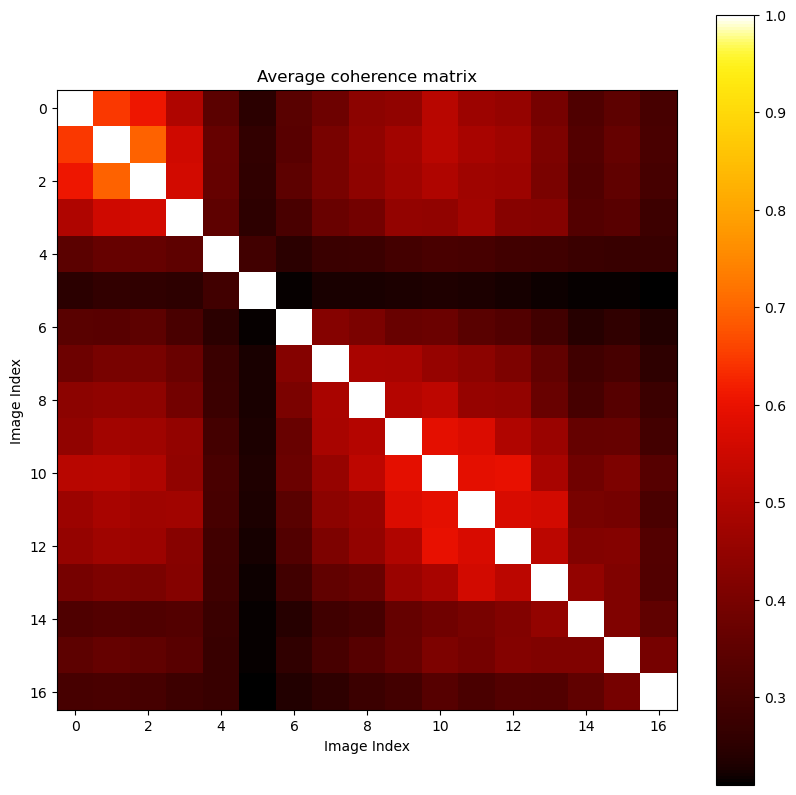

In [ ]:
ds_coh_zarr = zarr.open(ds_coh,'r')
fig, ax = plt.subplots(1,1,figsize=(10,10))
pcm = ax.imshow(np.mean(abs(ds_coh_zarr[:]),axis=0),cmap=colorcet.cm.fire)
ax.set(title='Average coherence matrix',xlabel='Image Index',ylabel='Image Index')
fig.colorbar(pcm)
fig.show()

Here we find the coherence matrix is better.

## Sumary

In this tutorial, we shows how to select DS candidates and refine them.